Import Data and Ploting Table

In [32]:
# load packages 
import matplotlib.pyplot as plt
from math import sqrt
from pandas import read_csv, datetime, DataFrame, concat
from sklearn.metrics import mean_squared_error

In [33]:
# parse datetime
def parser(x):
	return datetime.strptime('201'+x, '%Y-%m-%d')

In [34]:
dir_data = '../data/power_consumption/'

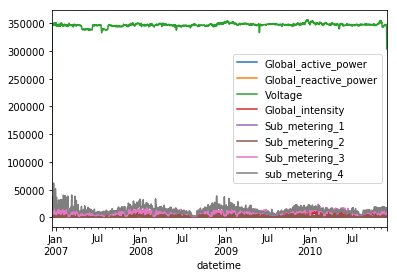

In [35]:
# plot dataset
series = read_csv(dir_data+'household_power_consumption_by_day.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
series.plot()
plt.show()

Persistence Algorithm

Step 1: Define the Supervised Learning Problem

In [36]:
#create lagged dataset - observation from t-1 to prediction t+1
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
#ataframe.columns = [0, len(dataframe)]
dataframe.head()

,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.934
1,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.934,3390.460,226.006,345725.30,14398.6,2033.0,4187.0,13341.0,36946.668
2,3390.460,226.006,345725.30,14398.6,2033.0,4187.0,13341.0,36946.668,2203.826,161.792,347373.62,9247.2,1063.0,2621.0,14018.0,19028.434
3,2203.826,161.792,347373.62,9247.2,1063.0,2621.0,14018.0,19028.434,1666.194,150.942,348479.00,7094.0,839.0,7602.0,6197.0,13131.900
4,1666.194,150.942,348479.00,7094.0,839.0,7602.0,6197.0,13131.900,2225.748,160.998,348923.62,9313.0,0.0,2648.0,14063.0,20384.800


Step 2: Train and Test Sets

In [37]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
print (train_size)

951


Step 3: Persistence Algorithm

In [38]:
# persistence model
def model_persistence(x):
	return x

Step 4: Make and Evaluate Forecast

In [39]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score1 = mean_squared_error(test_y, predictions)
test_score = sqrt(test_score1)
print('Test MSE: %.3f' % test_score)

Test MSE: 1418.190


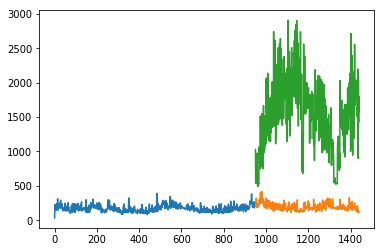

In [40]:
# plot the predictions
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()